In [1]:
library(repr); options(repr.plot.res = 100, repr.plot.width = 6, repr.plot.height = 6) # Change plot sizes (in cm) - this bit of code is only relevant if you are using a jupyter notebook - ignore otherwise

# Linear Models: Analysis of variance

```{admonition} Learning goals
**By the end of this chapter you should be able to:**
- Understand one-way ANOVA as a generalisation of the two-sample t-test to multiple groups
- Fit ANOVA models in R and interpret the ANOVA table (F-statistic, degrees of freedom, p-values)
- Check assumptions (normality of residuals, homogeneity of variance) using diagnostic plots
- Visualise group differences effectively with boxplots, mean ± SE plots, and coefficient plots
- Conduct post-hoc pairwise comparisons (Tukey HSD, Dunnett) when the overall F-test is significant
- Recognise when ANOVA is appropriate vs when alternative tests are needed
```

```{admonition} Prerequisites
:class: tip
**Before starting this chapter, you should:**
- Have covered experimental design concepts and t-tests from [t-tests](t-f-tests)
- Have some linear model intuition from [Regression](regress) — ANOVA is a linear model with categorical predictors
- Be able to create and interpret boxplots in R
```

## Introduction

Analysis of Variance, is very often a good choice if your response (dependent) variable is continuous, and your  predictor (independent) variables is categorical. 

In this chapter, you will learn to perform an anova, that is, fit this linear model to the data. Specifically, you will learn to[^fn1]:

* Visualize the data by plotting boxplots and barplots

* Fit an anova to test whether certain factors can explain (partition) the variation in your data

* Perform diagnostics to determine whether the factors are explanatory, and whether the Linear Model is appropriate for your data

* Explore and compare how much the different levels of a factor explain the variation in your data 


## What is anova?

<u>An</u>alysis  <u>O</u>f  <u>Va</u>riance (anova) is an extremely useful class of Linear models. It is very often appropriate when your response (dependent) variable is continuous, while your predictor (independent) variable is categorical. Specifically, *One-way anova* is used to compare means of two or more samples representing numerical, continuous data in response to a single categorical variable (factor).

---
:::{figure-md} what-is-anova

```{image} ./graphics/ANOVA_is_LM.svg
:alt: anova example
:width: 300px
```

**A dataset where an anova is appropriate.** Performing an anova on this dataset is the same as fitting the linear model $y  = \beta_1  + \beta_2 x_s + \beta_3 x_a$, where $x_s$ and $x_a$ are two levels ("treatments", representing statistically separate populations) within the factor (games console ownership). Here, the first treatment, the control, is captured by the baseline value $\beta_1$ (the sample with the lowest value, on the far left).
:::

---

(One-way) anova tests the null hypothesis that samples from two or more groups (the treatments or factors) are drawn from populations with the *same mean value*. That is, the null hypothesis is that all the groups are random samples from the *same* population (no statistical difference in their means). To do this, anova compares the variance in the data explained by fitting the linear model, to the unexplained variance (the null hypothesis. 

In other words, in effect, anova asks whether a linear model with a predictor (or explanatory variable) with at least two categorical levels (or factors), better accounts for the variance (Explained Sum of Squares, ESS, see below) than a null model of the form $y  = \beta_1$ ([Figure 1](what-is-anova)). Thus, anova is just a type of linear model.

By the end of this chapter, it will also make more sense to you how/why fitting a linear regression model to the data that we learned [previously](regress.ipynb), of the form $y = \beta_1  + \beta_2 x$ (where $x$ is a continuous predictor variable), requires an anova to determine if the model better fits than a null model of the form $y  = \beta_1$.

Typically, one-way anova is used to test for differences among at least three groups, since the two-group (or levels or factors) case can be covered by a $t$-test (see [t & F tests](t-f-tests.ipynb)). When there are only two means to compare, the $t$-test and the F-test are equivalent; the relation between anova and t is given by $F = t^2$.

An extension of one-way anova is two-way analysis of variance that examines the influence of two different categorical independent variables on one dependent variable — we will look at multiple predictor variables in the [Multiple Explanatory Variables Chapter](mul-expl.ipynb) onwards.

(anova:SoS)=
## Calculating the anova test statistic

anova uses of the [F-Statistic](t-f-tests.ipynb). To this end, an anova "partitions" variability in your data as follows:

**Total sum of squares (TSS)**: This is the sum of the squared difference between the observed dependent variable values (the $y$'s) and the mean of the response variable (denoted by $\bar{y}$), i.e.,

\begin{equation*}
    \text{TSS} = \sum_{i=1}^{n}(y_i - \bar{y})^2
\end{equation*}

TSS tells us how much variation there is in the dependent variable without having any other information (your null model). You might notice that TSS is the numerator of the *sample variance* (or it's square-root, the *sample standard deviation*), which you learned about [previously](exp_design-descriptive-stats).


**Explained sum of squares (ESS)**: Sum of the squared differences between the predicted $y$'s (denoted by $\hat{y}$'s) and $\bar{y}$, or,

\begin{equation*}
    \text{ESS} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2
\end{equation*}

ESS tells us how much of the variation in the dependent variable our alternative (linear) model was able to explain by measuring variation in the *modelled* $y$ values (the $\hat{y}$'s). In othjer words, it measures the reduction in uncertainty that occurs when the linear model is used to predict the responses. 

**residual sum of squares (rSS)**: Sum of the squared differences between the observed $y$'s (denoted by $y_i$ for the $i^{th}$ observation) and the predicted $\hat{y}$, or,

\begin{equation*}
    \text{rSS} = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
\end{equation*}

rSS tells us how much of the variation in the dependent variable our model could not explain. That is, it's the uncertainty that remains even after the linear model is used. The linear model is considered to be statistically significant if it can account for a large amount of variability in the response.

* And of course, TSS = ESS + rSS. That is, the OLS method "decomposes" the total variation in the dependent variable into an explained component (ESS; explained by the predictor) and an unexplained or residual component (the rSS).

The sums of squares used to calculate the statistical significance of the linear model (regression, anova, etc) through the F value are as follows:

|Type of Sum of Squares (SS)| SS Calculation | Degrees of Freedom (DF)|Mean Sum of Squares (MSS) | 
|:------|:------:|:------:|:------:|
|TSS | $\sum_{i=1}^{n}(y_i - \bar{y})^2$ | $n-1$ | $\frac{TSS}{n-1}$ |
|ESS | $\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$ | $n_c-1$ | $\frac{ESS}{n_c-1}$ |
|rSS | $\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$ | $n-n_c$ |$\frac{rSS}{n-n_c}$ |

Let's try to make sense of these calculations. Firstly, because we are dealing with samples understanding the degrees of freedom is critical. 

### Degrees of freedom

Each sum of squares has a corresponding degrees of freedom (DF) associated with it that gives the Mean Sum of Squares (MSS) — the Sums of Squares divided by the corresponding degrees of freedom.

* The TSS DF is one less than the number of observations $n-1$. This is because calculating TSS, needs $\bar y$ , which imposes loss of one degree of freedom. Note that MSS is thus nothing but the sample variance.

* The ESS DF is one less than the number of coefficients ($n_c$) (estimated parameters) in the model: $n_c-1$. Note that in the case where the linear model is an anova, the number of coefficients equals the number of "treatments" (the categories or levels in the predictor or factor). So for example, in [Figure 1](what-is-anova), there are three treatments (predictors) and therefore three coefficients ($\beta_1$, $\beta_2$, $\beta_3$), which means that the ESS degrees of freedom there is $n_c-1 = 2$.

* The rSS DF is the sample size $n$ minus the number of coefficients that you need to estimate ($n_c$), that is, $n - n_c$, because each estimated coefficient is an unknown parameter.  

### The F-Value (or ratio)

The F-Value or F-ratio, the test statistic used to decide whether the linear model fit is statistically significant, is the ratio of the Mean ESS to the Mean rSS: 

\begin{equation*}
F = \frac{\left(\frac{ESS}{n_c-1}\right)}{\left(\frac{rSS}{n-n_c}\right)}
\end{equation*}

If the null hypothesis that the group means are drawn from sub-populations with the *same* mean were indeed true, the between-group variance (numerator in this F-ratio) should be lower than the within-group variance (denominator). The null hypothesis is rejected if this F-ratio is large — the model explains a significant amount of variance, and we can conclude that the samples were drawn from populations with different mean values.

The p-value is calculated for the overall model fit using the F-distribution as you learned before, in [t & F tests](t-f-tests.ipynb).

Also note that the root Mean Square Error (rMSE), also known as the standard error of the estimate, is the square root of the Mean rSS. It is the standard deviation of the data about the Linear model, rather than about the sample mean.

### The r$^2$

The r$^2$, also called the Coefficient of Determination, is the proportion of total error (TSS) explained by the model (ESS), so the ratio ESS/TSS. That is it is the proportion of the variability in the response that is explained by the fitted model. Since TSS = ESS + rSS, r$^2$ can be rewritten as (TSS-rSS)/TSS = 1 - rSS/TSS. If a model has perfectly fits the data, $r^{2}=1$, and if it has no predictive capability $r^{2}=0$. In reality, r$^2$ will never be exactly 0 because even a null model will explain some variance just by chance due to sampling error. Note that $r$, the square root of r$^2$, is the multiple correlation coefficient: the correlation between the observed values ($y$), and the predicted values ($\hat{y}$).

#### Adjusted r$^2$

As additional predictors (and therefore linear model coefficients) are added to a linear model, r$^2$ increases even when the new predictors add no real predictive capability. The adjusted-r$^2$ tries to address this problem of over-specification or over-fitting by including the degrees of freedom: Adjusted r$^2$ = 1 - (rSS/$n-n_c-2$)/(TSS/$n-1$) [^fn2]. 

Thus, additional predictors with little explanatory capability will increase the ESS (and reduce the rSS), but they will also have lower rSS degrees of freedom (because of the additional number of fitted coefficients, $n_c$'s)[^fn3]. Thus if the additional predictors have poor predictive capability, these two reductions will cancel each other out. In other words, the Adjusted r$^2$ penalizes the addition of new predictors to the linear model, so you should always have a look at the Adjusted r$^2$ as a corrected measure of r$^2$.

## An example anova 

In this Chapter, we will use a new dataset of genome size and life history in mammals to try out a one-way anova. 

### The data

These data are taken from an online database of genome sizes and a [published database of mammalian life history](http://www.genomesize.com/). 

Trait data for these species are taken from: [ Jones, K. E. *et al.* (2009) PanTHErIA: a species-level database of life history, ecology, and geography of extant and recently extinct mammals. Ecology 90, 2648–2648](http://esapubs.org/archive/ecol/e090/184/metadata.htm).

    "$\star$ Download the file [`mammal_data.csv`](https://raw.githubusercontent.com/MulQuaBio/MQB/main/content/data/mammal_data.csv) from the github repository and save to your `Data` directory (right-click and \"Save as\"...).\n",

$\star$ Create a new blank script called `anova_Prac.R` and add some introductory comments.

$\star$ Use `read.csv` to load the data in the data frame `mammals` and then `str` and `summary` to examine the data:

In [2]:
mammals <- read.csv('../data/mammal_data.csv', stringsAsFactors = T)
str(mammals)

'data.frame':	379 obs. of  9 variables:
 $ Binomial       : Factor w/ 379 levels "Acinonyx jubatus",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ meanCvalue     : num  2.56 2.64 3.75 3.7 3.98 4.69 2.15 2.43 2.73 2.92 ...
 $ Order          : Factor w/ 21 levels "Artiodactyla",..: 2 17 17 17 1 1 4 17 17 17 ...
 $ AdultBodyMass_g: num  50500 41.2 130 96.5 94700 52300 15 25.3 50.5 33 ...
 $ DietBreadth    : int  1 NA 2 NA 5 2 NA 4 NA NA ...
 $ HabitatBreadth : int  1 NA 2 2 1 1 1 2 NA 1 ...
 $ LitterSize     : num  2.99 2.43 3.07 NA 1 1 0.99 4.59 3.9 3.77 ...
 $ GroundDwelling : Factor w/ 2 levels "No","Yes": 2 NA 2 2 2 2 1 2 NA 2 ...
 $ TrophicLevel   : Factor w/ 3 levels "Carnivore","Herbivore",..: 1 NA 2 NA 2 2 NA 3 NA NA ...


There are nine variables. The first two are the latin binomial and taxonomic order of each species, followed by the species mean genome size ('C value', picograms), adult body mass (g), diet breadth, habitat breadth, litter size and then two factors showing whether the species are ground dwelling and their trophic level. For more information, see the link to the data above. Let's summarize the data: 

In [3]:
summary(mammals)

                Binomial     meanCvalue             Order     AdultBodyMass_g  
 Acinonyx jubatus   :  1   Min.   :1.863   Rodentia    :120   Min.   :      5  
 Acomys cahirinus   :  1   1st Qu.:2.768   Chiroptera  : 80   1st Qu.:     37  
 Aconaemys fuscus   :  1   Median :3.250   Primates    : 63   Median :    286  
 Aconaemys sagei    :  1   Mean   :3.352   Artiodactyla: 22   Mean   :  51787  
 Addax nasomaculatus:  1   3rd Qu.:3.798   Carnivora   : 18   3rd Qu.:   5620  
 Aepyceros melampus :  1   Max.   :8.400   Xenarthra   : 15   Max.   :3940000  
 (Other)            :373                   (Other)     : 61   NA's   :13       
  DietBreadth    HabitatBreadth    LitterSize     GroundDwelling
 Min.   :1.000   Min.   :1.000   Min.   : 0.900   No  :159      
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 1.000   Yes :135      
 Median :3.000   Median :1.000   Median : 1.170   NA's: 85      
 Mean   :2.752   Mean   :1.445   Mean   : 2.543                 
 3rd Qu.:4.000   3rd Qu.:2.000   3r

You will see from the output of `summary` that there is lots of missing data for the life history traits.

### Exploring the data with boxplots

We are interested in finding out whether the mean C value for species varies predictably for different levels of life history traits (a typical one-way anova question). For example:

* Do carnivores or herbivores have larger genome sizes?

* Do ground dwelling mammals have larger or smaller genome sizes?

* Before we fit any models, we want to plot the data to see if the means within these groupings look different. We also want to check whether the variance looks similar for each group: *constant normal variance*! A simple way is to look at box and whisker plots, showing the median and range of the data:

$\star$ Generate a boxplot of the differences in genome sizes between trophic levels:

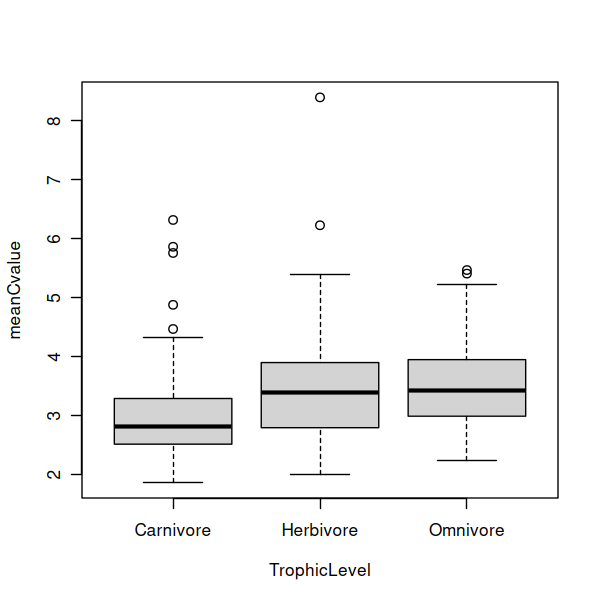

In [4]:
plot(meanCvalue ~ TrophicLevel, data = mammals)

Looking at the plots, it is clear that there is more spread in the data above the median than below. Create a new variable `logCvalue` in the `mammals` data frame containing logged C values.

$\star$ Now create a boxplot of log C values within trophic groups:

In [5]:
mammals$logCvalue <- log(mammals$meanCvalue)

$\star$ repeat the two plot commands to look at differences between ground dwelling and other species.

### Differences in means with barplots

Box and whisker plots show the median and spread in the data very clearly, but we want to test whether the means are different. This is $t$ test territory — how different are the means given the standard error — so it is common to use barplots and standard error bars to show these differences.

We're going to use some r code to construct a barplot by hand. We need to calculate the means and standard errors within trophic groups, but before we can do that, we need a new functions to calculate the standard error of a mean:

In [6]:
seMean <- function(x){ # get standard error of the mean from a set of values (x)
    x <- na.omit(x) # get rid of missing values

    se <- sqrt(var(x)/length(x)) # calculate the standard error

    return(se)  # tell the function to return the standard error
}

Now we can use the function `tapply`: it splits a variable up into groups from a factor and calculates statistics on each group using a function.

In [7]:
trophMeans <- tapply(mammals$logCvalue, mammals$TrophicLevel, FUN = mean, na.rm = TRUE)

print(trophMeans)

Carnivore Herbivore  Omnivore 
 1.085067  1.196928  1.236347 


And similarly, let's calculate the standard error of the mean using the function we made:   

In [8]:
trophSE <- tapply(mammals$logCvalue, mammals$TrophicLevel, FUN = seMean)

print(trophSE)

 Carnivore  Herbivore   Omnivore 
0.03982602 0.02205630 0.01843627 


Now we have to put these values together on the plot. 

Let's first get the upper and lower limits of the error bars:

In [9]:
upperSE <- trophMeans + trophSE
lowerSE <- trophMeans - trophSE

In [10]:
upperSE

Carnivore Herbivore  Omnivore 
 1.124893  1.218985  1.254784

In [11]:
lowerSE

Carnivore Herbivore  Omnivore 
 1.045241  1.174872  1.217911

Next, we draw the barplot, and also the error bars with two sequential commands:

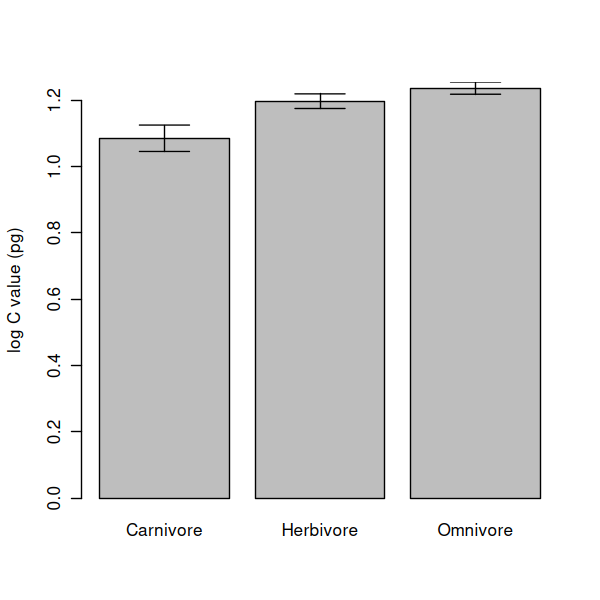

In [12]:
barMids <- barplot(trophMeans, ylim=c(0, max(upperSE)), ylab = 'log C value (pg)')
arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3)

In the first command, we plotted the bars and also store information on where the midpoints of the bars on the x-axis are. 

In [13]:
print(barMids) # see what barMids is

     [,1]
[1,]  0.7
[2,]  1.9
[3,]  3.1


That is, the `barplot` function no only plots bars, but also returns where the middle of the bars are on the x-axis, which we have stored in `barMids`. These values are numeric even though the x-axis represents a categorical variable because these are *locations* of the bars' midpoints in the plot's x-scale.   

Also, we have set the y-axis limits using `c(0, max(upperSE))` to make sure that the tops of error bars don't get cut off.

Then, we used the [`arrows` function](https://stat.ethz.ch/r-manual/r-devel/library/graphics/html/arrows.html) to add error bars. This function draws arrows between any two pairs of points (coordinates) `(x0,y0)` and `(x1,y1)` (in this case, `x0` and `x1` = `barMids`). The `ang=90` directive plots the arrow as a flat line by setting the arrow's angle (see what happens when you run the same pair of commands, but with `ang=50`, or `ang=110`). The `code=3` directive plots both "arrow" heads, not just start or end ones (try `code=1` or `code=2` instead and see what happens).

Now,

$\star$ Add all the lines of code from this section into your script. run it and check you get the graph above.

$\star$ Use the second two chunks as a model to plot a similar graph for `GroundDwelling`. You should get something like the plot below.

---

```{image} ./graphics/GDbarplot.png
:width: 400px
```

---

### An alternative to barplots

That is a lot of work to go through for a plot. Doing it the hard way uses some useful tricks, but one strength of r is that there is a huge list of add-on packages that you can use to get new functions that other people have written.

We will use the `gplots` package to create plots of group means and confidence intervals. rather than plotting the means $\pm$ 1 standard error, the option `p=0.95` uses the standard error and the number of data points to get 95% confidence intervals. The default `connect=TrUE` option adds a line connecting the means, which isn't useful here.

$\star$ replicate the code below into your script and run it to get the plots below.


Attaching package: ‘gplots’




The following object is masked from ‘package:stats’:

    lowess




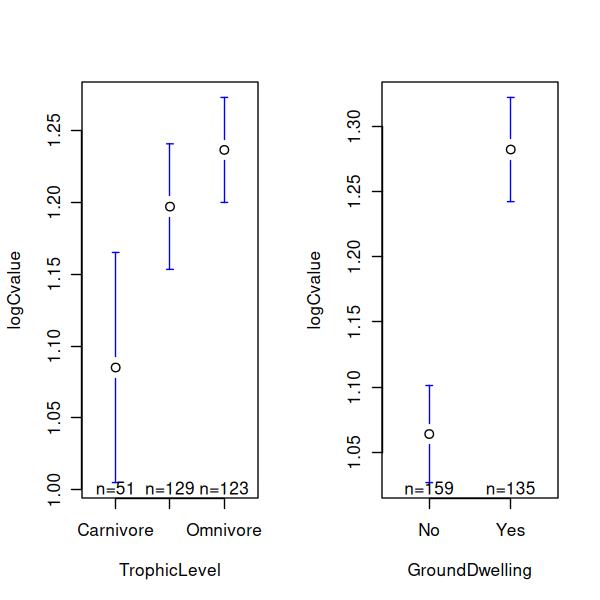

In [14]:
#Load the gplots package
library(gplots)

# Get plots of group means and standard errors
par(mfrow=c(1,2))
plotmeans(logCvalue ~ TrophicLevel, data=mammals, p=0.95, connect=FALSE)
plotmeans(logCvalue ~ GroundDwelling, data=mammals, p=0.95, connect=FALSE)

## Analysis of variance


Hopefully, those plots should convince you that there are differences in genome size between different trophic groups and between ground dwelling and other mammals. We'll now use a linear model to test whether those differences are significant.

$\star$ Using code from the [regression chapter](regress.ipynb) as a guide, create a linear
model called `trophicLM` which models log C value as a function of trophic group.

Use `anova` and `summary` to look at the analysis of variance table and then the coefficients of the model.

The anova table for the model should look like the one below: trophic level explains highly significant variation in genome size ($F= 7.22, \textrm{df}=2 \textrm{ and } 300, p =0.0009$).

In [15]:
trophicLM <- lm(logCvalue ~ TrophicLevel, data=mammals)

In [16]:
anova(trophicLM)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8268678,0.41343388,7.220365,0.0008657029
Residuals,300,17.1778247,0.05725942,NA,NA



*Note the style of reporting the result* - the statistic ($F$), degrees of freedom and $p$ value are all provided in support. A commonly used style is this: $F_{2,300}=7.22, p=0.0009$.

Pay close attention to the sum of squares column. Of a total of $17.18+0.83 = 18.01$ units of sums of squares, only 0.83 are explained by trophic level: $0.83/18.01 \approx 0.046$ or 4.6%. This ratio is called r$^2$, a measure of explanatory power, and shows that, although the model is very significant, it isn't very explanatory. We care about explanatory power
or effect size, `*not*` $p$ values.

The coefficients table for the model looks like this:

In [17]:
summary(trophicLM)


Call:
lm(formula = logCvalue ~ TrophicLevel, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50378 -0.16350 -0.00379  0.15114  0.93130 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.08507    0.03351  32.383  < 2e-16 ***
TrophicLevelHerbivore  0.11186    0.03958   2.826 0.005027 ** 
TrophicLevelOmnivore   0.15128    0.03985   3.796 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2393 on 300 degrees of freedom
  (76 observations deleted due to missingness)
Multiple R-squared:  0.04593,	Adjusted R-squared:  0.03956 
F-statistic:  7.22 on 2 and 300 DF,  p-value: 0.0008657


It shows the following:

* The reference level (or intercept) is for carnivores. Their mean genome size is significantly different from zero - this is not an exciting finding!

* The mean genome size for both herbivores and omnivores are both significantly different from carnivores. Both larger in fact: herbivore mean genome size = $1.085 + 0.112 = 1.197$ and omnivore mean genome size = $1.085 + 0.151 = 1.236$. These are the same group means we found above.

* The r$^2$ is shown and is the 4.6% we calculated above. The *adjusted* r$^2$ reduces the raw r$^2$ to account for the number of variables included in the model. That 4.6% would be even less impressive if we needed 6 explanatory variables to get it!

* The $F$ statistic, as in the anova table above.

$\star$ repeat the analysis of variance above to look at the effects of ground dwelling on genome size.

### Model criticism

The next question must be &mdash; and actually, we should do this before we go anywhere near the model summaries &mdas ;, *is the model appropriate for the data*?

$\star$ Using the [regression Chapter](regress.ipynb) to guide you, get the four model diagnostic plots for the trophic level model on a single figure.

The four plots are shown below.

---

```{image} ./graphics/modelDiag.svg
:width: 600px
```

---

Note that in a regression analysis, the predicted values from the fitted model take a range along the relationship $y=a + bx$. For anova, there are only a few predicted values — one for each group mean. This means that the plots above look different but we are looking for the same things: is there constant variance at each fitted value and are the residuals normally distributed? The answer for this model looks to be yes.

$\star$ Check the ground dwelling model in the same way.

(anova:CI)=
### Testing pairwise differences between levels

The one thing that the trophic level model does not tell us is whether there is a difference in genome size between omnivores and herbivores — both are compared to carnivores, but not to each other. This is because of the multiple pairwise testing problem mentioned in [t & F tests](t-f-tests.ipynb): if you do lots of tests then you may find small $p$ values by chance and say something important is going on when it is just random chance. This is called a false positive or Type I error.

With a 95% confidence interval, there is a 5% chance of a false positive *per test* but there are ways of getting a 5% chance across a set (or family) of tests. For linear models, we can use Tukey's Honest Significant Difference test. We have to convert the `lm` object into an `aov` object first.

In [18]:
TukeyTroph <- TukeyHSD(aov(trophicLM))
print(TukeyTroph)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = trophicLM)

$TrophicLevel
                          diff         lwr       upr     p adj
Herbivore-Carnivore 0.11186136  0.01863354 0.2050892 0.0138881
Omnivore-Carnivore  0.15128061  0.05741074 0.2451505 0.0005208
Omnivore-Herbivore  0.03941925 -0.03161080 0.1104493 0.3922731



The table shows the following:

* The differences between the three possible pairs and then the lower and
upper bounds of the 95% confidence interval for the difference and a $p$
value.

* In each case, we want to know if the difference could be zero: does the
95% confidence interval for each pair include zero.

* For the first two pairs, carnivores versus omnivores and herbivores, the confidence intervals do not include zero, so they are significantly different. For the comparison between herbivores and omnivores, the interval does include zero (difference = 0.039, 95% CI's limits are -0.032 & 0.110), so these groups are not significantly different.

* The $p$ values for the top two pairs are both larger (less significant) than in the summary table. The test has made it harder to find significant results.

You can visualise these confidence intervals by plotting the Tukey test. You have to tweak the graphics parameters to get a clean plot though.

In [19]:
library(repr) ; options(repr.plot.res = 100, repr.plot.width = 5, repr.plot.height = 5) # Change plot size

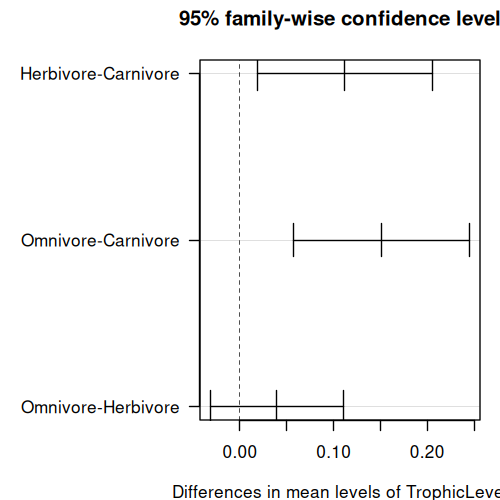

In [20]:
par(las=1, mar=c(4,10,3,1))
plot(TukeyTroph)

In the above plotting code, `las=1` makes the labels horizontal, while 
`mar=c(4,10,3,1)` makes the left margin wider by specifying `(bottom, left, top, right)`.


$\star$ Include the Tukey test in your script for both the trophic level and ground
dwelling models.

### Are the factors independent?

We've looked at two models, using trophic level and ground dwelling. It is worth asking whether these are independent factors. What if, for example, our herbivores are all big, ground dwellers? This is important to know because otherwise, a two-way anova would not be appropriate. We will look at interactions in the [Multiple Explanatory Variables Chapter](mul-expl-inter.ipynb).

OK, so we want to know whether the two factors are independent. This is a job for the $\chi^2$ test!

## The Chi-square test and count data

The Chi-square test, also known as $\chi^{2}$ test or chi-square test, is designed for scenarios where you want to statistically test how likely it is that an observed distribution of values is due to chance. It is also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables of which measurements are made are independent. In our mammals example below, the two variables are trophic level and ground dwelling.

Note that a $\chi^{2}$ test is designed to analyze categorical data. That is the data have been counted (count data) and divided into categories. It is not meant for continuous data (such as body weight, genome size, or height). For example, if you want to test whether
attending class influences how students perform on an exam, using test scores (from 0-100) as data would not be appropriate for a Chi-square test. However, arranging students into the categories "Pass" and "Fail" and counting up how many fall in each categories would be appropriate. Additionally, the data in a Chi-square table (see below) should not be in the form of percentages – only count data are allowed!

### The Chi-square test with the mammals data

We can easily build a table for a Chi-square test on the mammals data as follows:

In [21]:
factorTable <- table(mammals$GroundDwelling, mammals$TrophicLevel)
print(factorTable) 

     
      Carnivore Herbivore Omnivore
  No         26        45       64
  Yes        22        62       40


Now let's run the test:

In [22]:
chisq.test(factorTable)


	Pearson's Chi-squared test

data:  factorTable
X-squared = 8.1202, df = 2, p-value = 0.01725


The "X-squared" value is the $\chi^{2}$ *test
statistic*, akin to the t-value of the t-test or W value in the
Wilcox test.

The $\chi^{2}$ statistic is calculated as the sum of the quantity

$$\frac{(\mathrm{Observed} - \mathrm{Expected})^2}{\mathrm{Expected}}$$

across all the cells/categories in the table (so the sum would be over 6 categories in our current mammals example).

"Observed" is the observed proportion of data that fall in a certain category. For example, there are 26 species observed in the `Carnivore`, `No` category, and 22 in the `Carnivore`, `Yes` category.

"Expected" is what count would be expected if the values in each category were truly independent. Each cell has its own expected value, which is simply calculated as the count one would expect in each category if the value were generated in proportion to the total number seen in that category. So in our example, the expected value for the `Carnivore`, `No` category would be 

$26+22 \mathrm{~(Total~number~of~carnivore~species)} \times \frac{26+45+64 \mathrm{~(Total~number~in~the~"No"~category)}}{26+22+45+62+64+40 \mathrm{~(Total~number~of~species)}} = 48 \times \frac{135}{259} = 25.02$

The sum of all six (one for each cell in the table above) such calculations would be the $\chi^{2}$ value that r gave you through the `chisq.test()` above — try it!

Now back to the R output from the `chisq.test()` above. Why df = 2? This is calculated as $DF = (r - 1) * (c - 1)$ where $r$ and $c$ are the number of rows and columns in the $\chi^{2}$ table, respectively. The same principle you learned before applies here; you lose one degree of freedom for each new level of information you need to estimate: there is uncertainity about the information (number of categories) in both rows and columns, so you need to lose one degree of freedom for each.

Finally, note that the p-value is significant — we can conclude that the factors aren't independent. From the table, carnivores can be either ground dwelling or not, but herbivores tend to be ground dwelling and
omnivores tend not to be. Ah well... it's OK. We will look at a better way to analyze these data using "interactions" [later](mul-expl-inter.ipynb).

$\star$ Include and run the $\chi^2$ test in your script.

## Saving data

The last thing to do is to save a copy of the mammal data, including our new column of log data, for use in later chapters.

$\star$ Use this code in your script to create the saved data in your `Data` directory :

In [23]:
save(mammals, file='../data/mammals.rdata')

---
[1]: The helper script file is `anova.R`

[2]: That is, it is 1 minus the ratio of the square of the standard error of the estimate to the sample variance of the response

[3]: i.e., Standard error of the estimate won't decrease

[^fn3]: [2]: That is, it is 1 minus the ratio of the square of the standard error of the estimate to the sample variance of the response

[^fn2]: [1]: The helper script file is `anova.R`

[^fn1]: ---
